Homework 4: Sentiment Analysis - Task 2
----

Names & Sections
----
Names: Alec Condry (4120) and Shrihari Subramaniam (4120)

Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.
https://www.nltk.org/_modules/nltk/classify/naivebayes.html 

In [1]:
# our utility functions
import random

# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier

# some potentially helpful data structures from collections
from collections import defaultdict, Counter

import numpy as np
# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
#import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hsubr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

In [3]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# [[list of tokens], label] 

In [4]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and 
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value


# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference 
# between using binarized features and using counts (non binarized features)
def word_feats(words):
    """
    This function converts a list of words so that they are featurized
    for nltk's format for bag-of-words
    Parameters:
    words - list of words where each element is a single word 
    Returns: dict mapping every word to True
    """
    return dict([(word, True) for word in words]) 

# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled
# Should take < 10 sec to train (on Felix's computer this takes 0.5 sec)
vocab = set([token for review in train_tups[0] for token in review])
vocab_size = len(vocab)

def create_binarized_features(train_data):    
    """
    Given the training data, create a list of tuples of the format (counts, label) where counts have
    a max value of 1 if the word exists in given set of features.
    Args:
        train_tups: a list of all the training data in the format [([word1, word2, ...], label), ...]
    Returns:
        featuresets: a list of the featurized data in the format [({word1 : 1, word2 : 1, ...}, label), ...]
    """
    featuresets_b = []
    for review, label in zip(train_data[0], train_data[1]):
        counts = {w :1 for w in dict(Counter(review)).keys()}
        featuresets_b.append((counts, label))
    return featuresets_b

def create_multinomial_features(train_data):
    """
    Given the training data, create a list of tuples of the format (counts, label) where counts is
    the number of times a word appears in a given review.
    Args:
        train_tups: a list of all the training data in the format [([word1, word2, ...], label), ...]
    Returns:
        featuresets: a list of the featurized data in the format [({word1 : w1_count, word2 : w2_count, ...}, label), ...]
    """
    featuresets_m = []
    for review, label in zip(train_data[0], train_data[1]):
        counts = dict(Counter(review))
        featuresets_m.append((counts, label))
    return featuresets_m

# test to make sure that you can train the classifier and use it to classify a new example
featuresets_m = create_multinomial_features(train_tups)
featuresets_b = create_multinomial_features(train_tups)
classifier_multi = NaiveBayesClassifier.train(featuresets_m)
classifier_bi = NaiveBayesClassifier.train(featuresets_b)
featurized_example = word_feats(dev_tups[0][0])

print("Multinomial Classifier:")
print(f"class 0: {classifier_multi.prob_classify(featurized_example).prob(0)}")  # get the probability for class '0'
print(f"class 1: {classifier_multi.prob_classify(featurized_example).prob(1)}")  # get the probability for class '1'
print(f"Classified as {'positive' if classifier_multi.classify(word_feats(dev_tups[0][0])) == 1 else 'negative'}")
print()
print("Binarized Classifier:")
print(f"class 0: {classifier_bi.prob_classify(featurized_example).prob(0)}")  # get the probability for class '0'
print(f"class 1: {classifier_bi.prob_classify(featurized_example).prob(1)}")  # get the probability for class '1'
print(f"Classified as {'positive' if classifier_bi.classify(word_feats(dev_tups[0][0])) == 1 else 'negative'}")

Multinomial Classifier:
class 0: 0.8574938669515418
class 1: 0.1425061330484529
Classified as negative

Binarized Classifier:
class 0: 0.8574938669515418
class 1: 0.1425061330484529
Classified as negative


In [5]:
## Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)
preds_m = []
preds_b = []
for review in dev_tups[0]:
    class_result_m = classifier_multi.classify(word_feats(review))
    class_result_b = classifier_bi.classify(word_feats(review))
    preds_m.append(class_result_m)
    preds_b.append(class_result_b)

print("Binarized Classifier:")
sutils.get_prfa(dev_tups[1], preds_b, verbose=True)
print()
print("Multinomial Classifier:")
sutils.get_prfa(dev_tups[1], preds_m, verbose=True)

Binarized Classifier:
Precision = 0.875
Recall =    0.8
f1 score =  0.8358208955223881
Accuracy =  0.835

Multinomial Classifier:
Precision = 0.875
Recall =    0.8
f1 score =  0.8358208955223881
Accuracy =  0.835


(0.875, 0.8, 0.8358208955223881, 0.835)

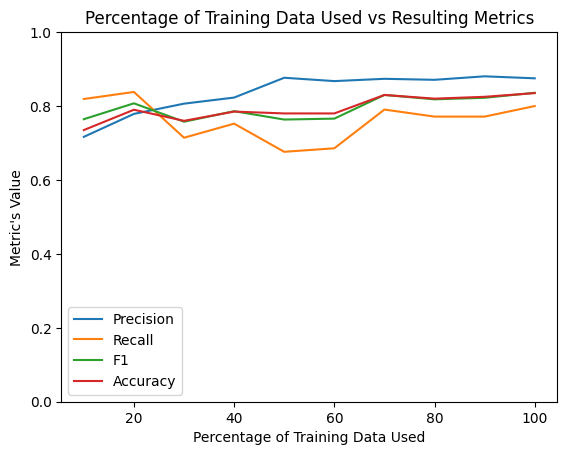

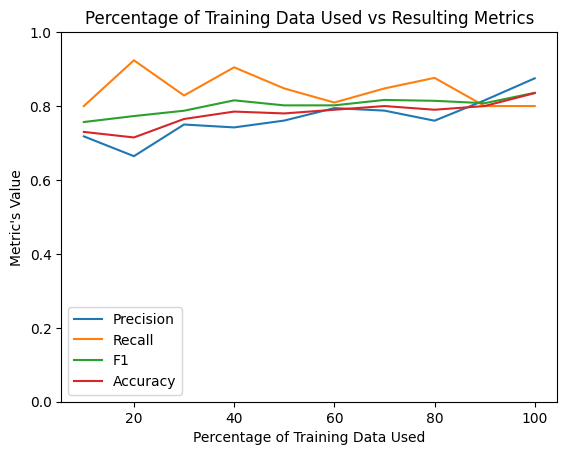

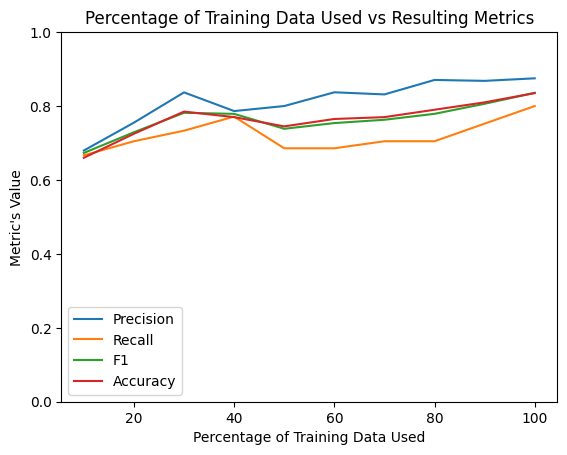

In [6]:
# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels
num_classifiers = 10
data_len = len(train_tups[0])

for g in range(0, 3):
    metrics = []
    indicies = [x for x in range(0, data_len)]
    random.shuffle(indicies)
    for i in range(0, num_classifiers):
        end = data_len // num_classifiers * (i + 1)
        slice_train_tups = [[train_tups[0][i] for i in indicies[0:end]], 
                            [train_tups[1][i] for i in indicies[0:end]]]
        featuresets = create_multinomial_features(slice_train_tups)
        classifier = NaiveBayesClassifier.train(featuresets)
        preds = [classifier.classify(word_feats(review)) for review in dev_tups[0]]
        metrics.append(sutils.get_prfa(dev_tups[1], preds))
    sutils.create_training_graph(metrics, "NaiveBayes", g, "./", False)

# takes approximately 3.5sec to run on Felix's computer

Test your model using both a __binarized__ and a __multinomial__ BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

- f1 score binarized: 0.806
- f1 score multinomial: 0.836